# IQR

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.datasets import load_boston

from feature_engine.outlier_removers import Winsorizer

In [5]:
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston['MEDV'] = boston_dataset.target

boston.head()           

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [6]:
windsoriser = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [7]:
boston_t = windsoriser.transform(boston)

In [8]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

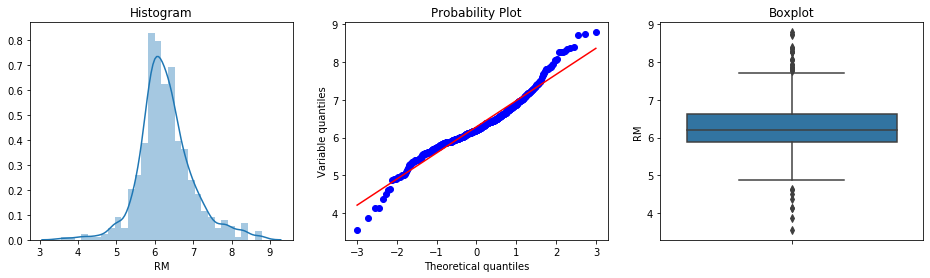

In [9]:
diagnostic_plots(boston, 'RM')

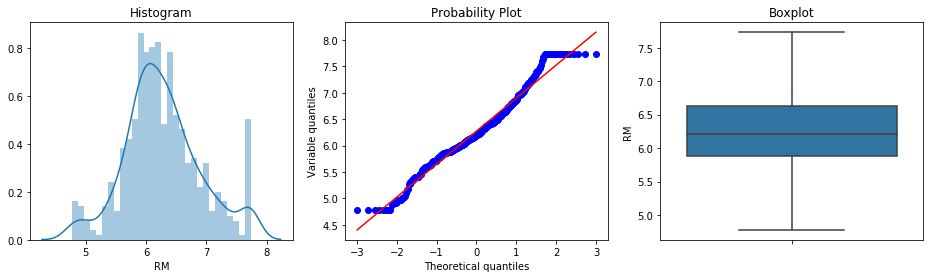

In [10]:
diagnostic_plots(boston_t, 'RM')

# Gausian or Z value approach

In [11]:
windsoriser = Winsorizer(distribution='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(distribution='gaussian', fold=3, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [12]:
boston_t = windsoriser.transform(boston)

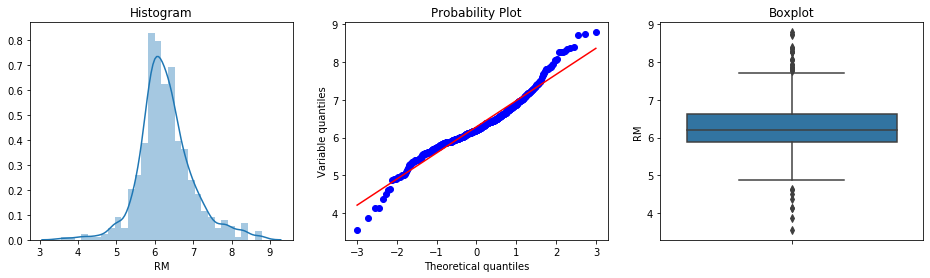

In [13]:
diagnostic_plots(boston, 'RM')

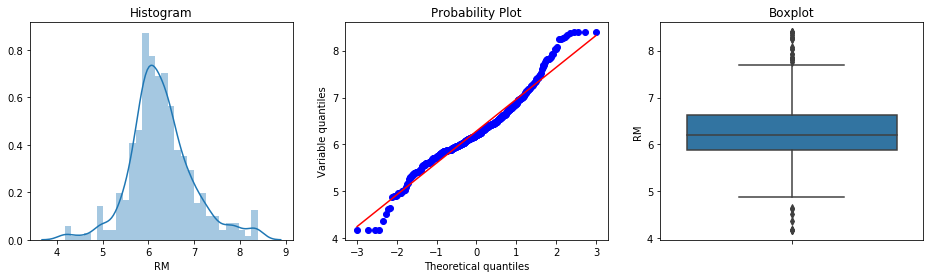

In [14]:
diagnostic_plots(boston_t, 'RM')

### Not a good separation of outliers, here we can tune fold value to different values and check